# National Address DB to VVI mapping
Writen by Biplab Bhattacharya
Date: 01/16/2024
Description: exploring the US National Address Database, vizient vulnerability index and census tract information

So far, I've been able to do the following:
1. Get LatLong coordiantes from US ADDRESS DATA
2. Map LatLong to CensusTract using censusgeocode
3. Create basemap for state of PA by censustract
4. Get Vizient Vulnerability Index info by censustract
5. Map VVI to US Addfessdaa using censusgeocode


In [ ]:
#requirements.txt

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pygris
import seaborn as sb
import geopandas as gpd

import censusgeocode as cg 

import dask.dataframe as dd

Read all inputs

In [ ]:
#Read all input files

##import VVI at tract level

vvi_tract = pd.read_csv("../data/VVI_tract.csv")
#vvi_tract.head()


## PA Addresses
#nad_df = pd.read_csv("../data/NAD.txt")
PA_df = pd.read_csv("../data/PA_data.csv")
print("PA state data len:", len(PA_df))
print(PA_df.head())

C:\Users\bbhattacharya\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (1,5,7,8,11,12,14,15,17,19,21,26,27,34,38,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


PA state data len: 864447
   OID AddNum_Pre  Add_Number AddNum_Suf AddNo_Full St_PreMod St_PreDir  \
0   -1        NaN        1193        NaN       1193       NaN       NaN   
1   -1        NaN          10        NaN         10       NaN     South   
2   -1        NaN         247        NaN        247       NaN       NaN   
3   -1        NaN          54        NaN         54       NaN       NaN   
4   -1        NaN          66        NaN         66       NaN       NaN   

  St_PreTyp St_PreSep      St_Name  ... Lifecycle Effective Expire  \
0       NaN       NaN  GRANGE HALL  ...       NaN       NaN    NaN   
1       NaN       NaN        GRANT  ...       NaN       NaN    NaN   
2       NaN       NaN        GRANT  ...       NaN       NaN    NaN   
3       NaN       NaN     GRATOSKY  ...       NaN       NaN    NaN   
4       NaN       NaN     GRATOSKY  ...       NaN       NaN    NaN   

   DateUpdate AnomStatus LocatnDesc Addr_Type DeliverTyp  \
0  2020-01-06        NaN        NaN   Unkn

Main

In [ ]:
df_PA_sub = PA_df[['Longitude', 'Latitude', 'Addr_Type']]

Tests and appendix code

In [ ]:
#### Testing Block

### Exploring VVI
##

#print(vvi_tract['censusTract'].head(10))
a = vvi_tract[vvi_tract['censusTract'] == 48037011403]
print(a)

# VVI histograms
vvi_tract_vars = vvi_tract.drop('censusTract', axis = 1)
fig, axis = plt.subplots(2, 5, tight_layout=True, figsize = (20,8))
vvi_tract_vars.hist(ax=axis)

# VVI Correlations
corr_plot = sb.heatmap(vvi_tract_vars.corr(),annot = True)

### Chunking test for NAD
##

chunksize = 1000
length = 0
for chunk in pd.read_csv("../data/NAD.txt", chunksize=chunksize):
    print(length)
    length = length + len(chunk)


### Dask
##    

nad_dask_df = dd.read_csv("../data/NAD.txt")


### Length
##

print("NAD dask:",len(nad_dask_df))
#print("NAD pandas:",len(nad_df))


In [ ]:
nad_df['State'].head(10)
#list(nad_df.columns)

state_freq = nad_df['State'].value_counts()
print(state_freq)

df_ok = nad_df.loc[nad_df['State']=='OK']
print(df_ok.head(10))
print(list(df_ok.columns))

df_ok_sub = df_ok[['Longitude', 'Latitude', 'Addr_Type']]


AZ    3269679
CO    1895631
AR    1583353
AK     237889
AL     138325
CA     100065
MO         55
OK         16
TX         10
LA          5
MS          4
TN          4
Name: State, dtype: int64
         OID AddNum_Pre  Add_Number AddNum_Suf AddNo_Full St_PreMod St_PreDir  \
1105915   -1        NaN         921        NaN        921       NaN       NaN   
1105916   -1        NaN         925        NaN        925       NaN       NaN   
1105976   -1        NaN         191        NaN        191       NaN       NaN   
1105977   -1        NaN         189        NaN        189       NaN       NaN   
1105978   -1        NaN         235        NaN        235       NaN       NaN   
1106588   -1        NaN         140        NaN        140       NaN       NaN   
1106590   -1        NaN         149        NaN        149       NaN       NaN   
1106591   -1        NaN         145        NaN        145       NaN       NaN   
1109962   -1        NaN         440        NaN        440       NaN       NaN

In [ ]:
print(df_PA_sub)

        Longitude   Latitude Addr_Type
0      -79.012304  40.441127   Unknown
1      -79.158995  40.542647   Unknown
2      -79.195501  40.470108   Unknown
3      -79.119613  40.510567   Unknown
4      -79.119382  40.510684   Unknown
...           ...        ...       ...
864442 -79.391714  40.313817   Unknown
864443 -79.392162  40.313644   Unknown
864444 -79.798937  40.170524   Unknown
864445 -79.798974  40.170184   Unknown
864446 -79.301439  40.365873   Unknown

[864447 rows x 3 columns]


array([<AxesSubplot:title={'center':'CleanEnvironment'}>,
       <AxesSubplot:title={'center':'Economic'}>,
       <AxesSubplot:title={'center':'Education'}>,
       <AxesSubplot:title={'center':'HealthCareAccess'}>,
       <AxesSubplot:title={'center':'Housing'}>,
       <AxesSubplot:title={'center':'Neighborhood'}>,
       <AxesSubplot:title={'center':'PublicSafety'}>,
       <AxesSubplot:title={'center':'Social'}>,
       <AxesSubplot:title={'center':'Transportation'}>,
       <AxesSubplot:title={'center':'VVI'}>], dtype=object)

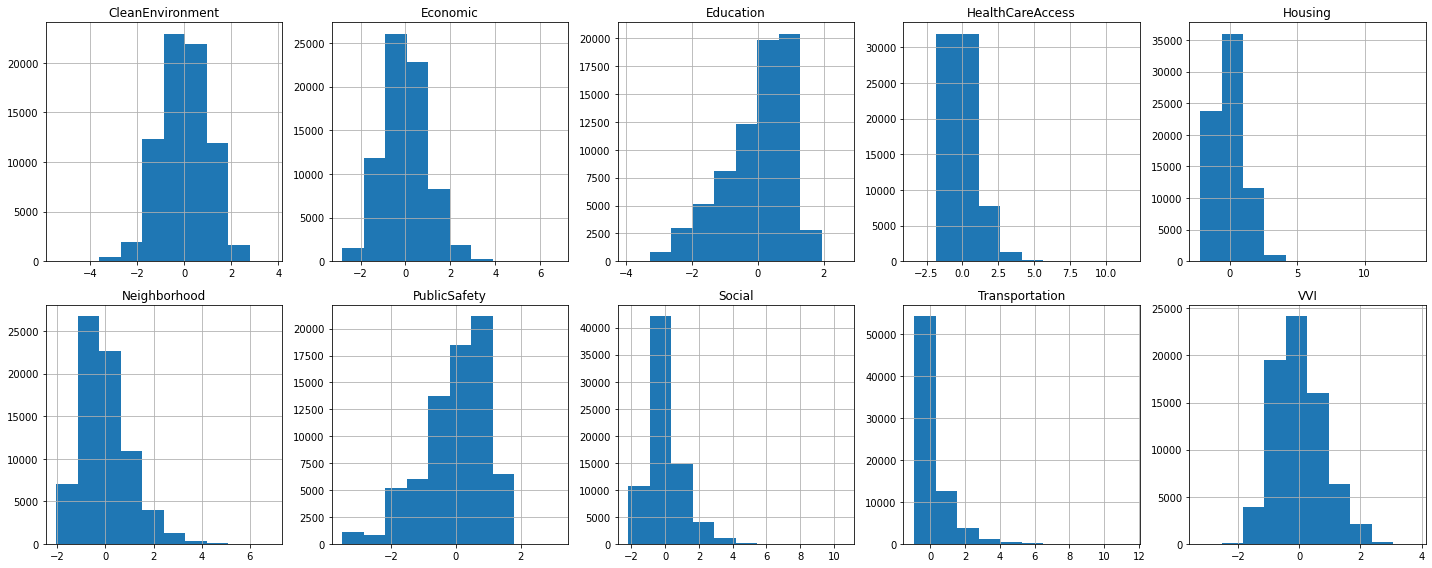

In [ ]:
vvi_tract_vars = vvi_tract.drop('censusTract', axis = 1)
fig, axis = plt.subplots(2, 5, tight_layout=True, figsize = (20,8))
vvi_tract_vars.hist(ax=axis)

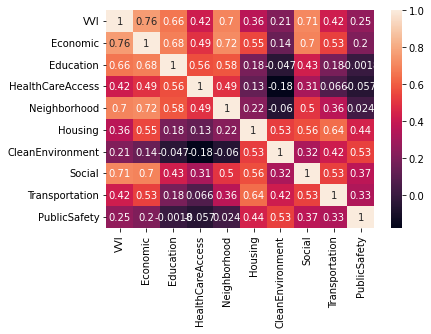

In [ ]:
corr_plot = sb.heatmap(vvi_tract_vars.corr(),annot = True)

In [ ]:
tract_shp = gpd.read_file('../data/cb_2022_us_tract_500k.zip')

In [ ]:
pa_tract = tract_shp[tract_shp.STATE_NAME == 'Pennsylvania']
pa_tract.head(5)

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID    NAME  \
800      42      001  031101  1400000US42001031101  42001031101  311.01   
805      42      013  100400  1400000US42013100400  42013100400    1004   
806      42      013  100300  1400000US42013100300  42013100300    1003   
807      42      013  100800  1400000US42013100800  42013100800    1008   
821      42      011  000100  1400000US42011000100  42011000100       1   

                NAMELSAD STUSPS    NAMELSADCO    STATE_NAME LSAD    ALAND  \
800  Census Tract 311.01     PA  Adams County  Pennsylvania   CT  3042633   
805    Census Tract 1004     PA  Blair County  Pennsylvania   CT   993724   
806    Census Tract 1003     PA  Blair County  Pennsylvania   CT  1217046   
807    Census Tract 1008     PA  Blair County  Pennsylvania   CT   996553   
821       Census Tract 1     PA  Berks County  Pennsylvania   CT   807871   

     AWATER                                           geometry  
800       0  POLYGON ((-77.03108 39.80239, -77.02262 39.806...  
805       0  POLYGON ((-78.42478 40.50948, -78.41635 40.514...  
806       0  POLYGON ((-78.42339 40.50129, -78.41858 40.504...  
807       0  POLYGON ((-78.41067 40.53529, -78.40802 40.537...  
821       0  POLYGON ((-75.93179 40.33537, -75.93170 40.338...

In [ ]:
pa_tract.explore()

In [ ]:
pa_tract['fips'] = pa_tract['STATEFP'] + pa_tract['COUNTYFP'] + pa_tract['TRACTCE'] 
pa_tract.head(5)

STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID    NAME  \
800      42      001  031101  1400000US42001031101  42001031101  311.01   
805      42      013  100400  1400000US42013100400  42013100400    1004   
806      42      013  100300  1400000US42013100300  42013100300    1003   
807      42      013  100800  1400000US42013100800  42013100800    1008   
821      42      011  000100  1400000US42011000100  42011000100       1   

                NAMELSAD STUSPS    NAMELSADCO    STATE_NAME LSAD    ALAND  \
800  Census Tract 311.01     PA  Adams County  Pennsylvania   CT  3042633   
805    Census Tract 1004     PA  Blair County  Pennsylvania   CT   993724   
806    Census Tract 1003     PA  Blair County  Pennsylvania   CT  1217046   
807    Census Tract 1008     PA  Blair County  Pennsylvania   CT   996553   
821       Census Tract 1     PA  Berks County  Pennsylvania   CT   807871   

     AWATER                                           geometry         fips  
800       0  POLYGON ((-77.03108 39.80239, -77.02262 39.806...  42001031101  
805       0  POLYGON ((-78.42478 40.50948, -78.41635 40.514...  42013100400  
806       0  POLYGON ((-78.42339 40.50129, -78.41858 40.504...  42013100300  
807       0  POLYGON ((-78.41067 40.53529, -78.40802 40.537...  42013100800  
821       0  POLYGON ((-75.93179 40.33537, -75.93170 40.338...  42011000100

In [ ]:
#testing if I can extract Census tract information from lat and long
#print(nad_df.Latitude[1])
#result = cg.coordinates(x=nad_df.Longitude[1], y=nad_df.Latitude[1])
result = cg.coordinates(x="-76.883484", y="40.965027")
result

{'States': [{'STATENS': '01779798',
   'GEOID': '42',
   'CENTLAT': '+40.9011320',
   'AREAWATER': 3397855215,
   'STATE': '42',
   'BASENAME': 'Pennsylvania',
   'STUSAB': 'PA',
   'OID': '27490163788605',
   'LSADC': '00',
   'FUNCSTAT': 'A',
   'INTPTLAT': '+40.9046042',
   'DIVISION': '2',
   'NAME': 'Pennsylvania',
   'REGION': '1',
   'OBJECTID': 34,
   'CENTLON': '-077.8369304',
   'AREALAND': 115881839569,
   'INTPTLON': '-077.8275233',
   'MTFCC': 'G4000',
   'CENT': (-77.8369304, 40.901132),
   'INTPT': (-77.8275233, 40.9046042)}],
 'County Subdivisions': [{'COUSUB': '42976',
   'GEOID': '4211942976',
   'CENTLAT': '+40.9641264',
   'AREAWATER': 0,
   'STATE': '42',
   'BASENAME': 'Lewisburg',
   'OID': '27690308830252',
   'LSADC': '21',
   'FUNCSTAT': 'F',
   'INTPTLAT': '+40.9641264',
   'NAME': 'Lewisburg borough',
   'OBJECTID': 36073,
   'CENTLON': '-076.8899572',
   'COUSUBCC': 'C5',
   'AREALAND': 2520573,
   'INTPTLON': '-076.8899572',
   'MTFCC': 'G4040',
   'COUSUB

In [ ]:
print(pa_tract[pa_tract['fips'] == '42119090700'])

      STATEFP COUNTYFP TRACTCE              AFFGEOID        GEOID NAME  \
22715      42      119  090700  1400000US42119090700  42119090700  907   

               NAMELSAD STUSPS    NAMELSADCO    STATE_NAME LSAD    ALAND  \
22715  Census Tract 907     PA  Union County  Pennsylvania   CT  2254130   

       AWATER                                           geometry         fips  
22715       0  POLYGON ((-76.90861 40.96720, -76.89917 40.967...  42119090700  


In [ ]:
#res = [d.get('Census Tracts') for d in result]
a = result['Census Tracts'][0].get('GEOID')
print(a)
#a.get('GEOID')


42119090700


In [16]:
for index,row in df_PA_sub.iterrows():
    print(row["Longitude"],row['Latitude'])
    info = cg.coordinates(x=row["Longitude"], y=row["Latitude"])
    id = info['Census Tracts'][0].get('GEOID')
    print(id)
    df_PA_sub.loc[index,"censusTract"] = float(id)

print(df_PA_sub)


df_PA_sub = pd.merge(df_PA_sub,vvi_tract[['censusTract','VVI']],on='censusTract', how='left')

-79.0123042768308 40.441127270353704
42063962200
-79.1589953736337 40.5426470028831


c:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
c:\Program Files\Python37\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


42063961700
-79.195500583737 40.4701078528517
42063962000
-79.11961329984992 40.5105670003021
42063961600
-79.1193815093537 40.510684131385396
42063961600
-79.1189393900119 40.510899073675105
42063961600
-78.9767784019655 40.4303321496465
42063962200
-79.0982308170246 40.7443795153516
42063960500
-79.09825281946091 40.7443927773216
42063960500
-79.0982840772395 40.7444111403067
42063960500
-79.098320001766 40.7444328021026
42063960500
-79.09869408540321 40.7446112258026
42063960500
-79.1557532549586 40.841275528180795
42063960200
-79.2015543133687 40.8087475160741
42063960200
-79.2018862776971 40.8080927539497
42063960200
-79.2023669599174 40.807268777679205
42063960200
-79.202416484039 40.8073505730635
42063960200
-79.202678757966 40.806742275912704
42063960200
-79.2029155772311 40.8065241003081
42063960200
-79.2028764915331 40.8062453963491
42063960200
-79.2101381623711 40.802248675442
42063960200
-79.2104948887603 40.802041874374105
42063960200
-79.2116119357313 40.800442915618
4206

KeyboardInterrupt: 

In [200]:
print(df_ok_sub)

    Longitude   Latitude     Addr_Type   censusTract       VVI
0  -94.481215  33.849518  Agricultural  4.008910e+10  0.605340
1  -94.480611  33.850079  Agricultural  4.008910e+10  0.605340
2  -94.482924  33.751789  Agricultural  4.008910e+10  0.605340
3  -94.484955  33.751787  Agricultural  4.008910e+10  0.605340
4  -94.483034  33.753216  Agricultural  4.008910e+10  0.605340
5  -94.486724  33.724030  Agricultural  4.008910e+10  0.605340
6  -94.486572  33.715904   Residential  4.008910e+10  0.605340
7  -94.485096  33.715321   Residential  4.008910e+10  0.605340
8  -94.486148  33.692818    Commercial  4.008910e+10  0.605340
9  -94.487266  33.716135   Residential  4.008910e+10  0.605340
10 -94.458168  34.633758       Unknown  4.007904e+10  0.530167
11 -94.461472  34.510802       Unknown  4.007904e+10  0.530167
12 -94.465841  34.359842   Residential  4.008910e+10 -0.216649
13 -94.466582  34.357460       Unknown  4.008910e+10 -0.216649
14 -94.439555  35.320450    Industrial  4.007904e+10  1

In [173]:
#print(vvi_tract[vvi_tract["censusTract"] == '1001020500'])

#print(vvi_tract.loc[vvi_tract['censusTract'] == '01001020100'])
df_tx_sub.dtypes
# mask = vvi_tract['censusTract'] == '01001020100'
# print(mask)

OID              int64
Longitude      float64
Latitude       float64
Addr_Type       object
censusTract    float64
VVI_x          float64
VVI_y          float64
dtype: object